# D209 - Data Mining I
by Desiree McElroy

In [1]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w

# Part I: Research Question

A.  Describe the purpose of this data mining report by doing the following:

## A1. Research Question

My research question is what could be contributing factors in someone being diagnosed with diabetes? Could these features be solid predictors in identifying who is more at risk for diabetes?

## A2.  Goal of the Data Analysis.

 According to the Center for Disease Control (CDC), diabetes affects more than 38 million Americans. This disease remains a serious illness among population. By exploring this data set using Naive Bayes methods, I may be able to uncover what underlying patterns and correlations that may be contributing to this disease. Demographics, location and lifestyle features are known to be associated with the risk of diabetes.
By incorporating these variables into a Naive Bayes model, I can predict the likelihood of diabetes and identify which factors are most strongly associated with a diagnosis. Naive Bayes is effective for this because it assumes feature independence, allowing it to efficiently model the contributions of each factor. In summary, my main goal is to identify what importance each feature may have in relation to diabetes.

# Part II: Method Justification

## B1.  Naive Bayes Justification

Naive Bayes is an effective algorithm for classifying features in predicting target variables like diabetes due to its simplicity, speed, and ability to handle high dimensional data. The algorithm's different functions, such as Gaussian Naive Bayes (handling continuous variables like age) and Bernoulli Naive Bayes (suitable for binary and categorical features) make it adaptable to datasets with a variety of data types. This flexibility makes it ideal for this dataset.

Naive Bayes can still perform well even when its assumption of feature independence is violated. Additionally, while Naive Bayes does not necessarily address imbalanced data, it can handle imbalanced datasets well due to the probabilistic nature of its predictions. This is vital for features like gender that contains severe class imbalances.

While dimensionality isn’t a major concern in the dataset (lacking high cardinality), Naive Bayes performs well in high-dimensional spaces, particularly in text classification tasks. Lastly, Naive Bayes is computationally efficient, making it suitable for faster predictions, which can be beneficial for larger healthcare systems and real life applications.

Given the nature of the dataset, Naive Bayes is expected to perform well in identifying contributing factors for diabetes, such as age, area, and medical conditions (e.g. overweight). The model will provide probabilistic outputs, allowing the estimation of the likelihood of a patient being diagnosed with diabetes based on the features.

## B2.  Summarize one assumption of the chosen classification method.
One of the main reasons Naive Bayes received its name ***naive*** is because of an assumption that all feature variables are completely independent of one another. It naively assumes the "presence or absence of a particular feature does not affect the presence or absence of any other feature" (Spot Intelligence 2024). Despite this assumption often being violated due to its unrealistic nature, this algorithm still performs fairly well in practice.

## B3.  Python Packages & Libraries

Python has many versatile libraries including NumPy (numerical python operations) and Pandas (used for manipulation of dataframes). During the wrangling phase, the pandas library proves to be incredibly useful for the manipulation of dataframes, including cleaning, transforming and creating new features. It has many useful functions needed to help prepare dataframes for modeling such as functions to fill nulls, change data types, and one hot encode variables. Numpy is also a favorite with it's powerful performance with numerical operations on arrays. This is especially useful for preparing data for machine learning models like Naive Bayes.

Scikit-learn (sklearn) is a great library for machine learning because it provides a wide range of efficient tools for model building, data preprocessing, and evaluation. It offers user friendly functions for classification tasks. Additionally, its integration with NumPy and Pandas makes data manipulation easily achievable, and it supports techniques such as cross validation and model fine tuning.

In summary, these versatile packages, their ease of use and large community make them a strong tool for this project.

# Part III: Data Preparation
## C1.  Data Preprocessing
While data in general requires many preprocessing steps to prepare for machine learning, one of the most important ones is one hot encoding. Models such as Naive Bayes require numerical data. When working with tabular data, any non numerical variables must be converted to numerical representation. One hot encoding is an especially useful function in converting categorical variables into readable numerical columns. Each value in the specific column will be transformed into a *flag* column (binary 1/0). For example, gender has the three values: female, male and nonbinary. In order for this to be translated numerically, each value will be transformed into its own flag column, often dropping the first column to avoid repetitiveness. In turn the results will be two binary columns representing `male` and `nonbinary`. Both columns having 0 as a value mathematically represents the female gender.

## C2.  Initial data set variables that you will use to perform the analysis for the classification question from part A1 and classify each variable as numeric or categorical.

The initial dataset variables below show a variety of descriptors including patient medical history, geographical information and hospital stay details. Medical history information includes history of backpain, obesity and age. Geographical information describes the area in which they live in including the local population count and area type. Lastly, the details of their medical stay include what type of admission it was and services receieved.

My **numerical** variables consist of:\

| Feature       | Description   |
| :------------- | :----------: |
|`age` | numerical |
|`vitd_levels` | numerical |
|`daily_charges` | numerical |
|`additional_charges` | numerical |
|`population` | numerical |
|`children` | numerical |
|`doc_visits` | numerical |
|`full_meals_eaten` | numerical |
|`vitd_supplement` | numerical |
| `gender` | categorical |
|`marital` | categorical |
|`area` | categorical |
|`state` | categorical |
|`initial_admin` | categorical |
|`complication_risk` | categorical |
|`services_received` | categorical |
|`readmission` | categorical |
|`high_blood` | categorical |
|`stroke` | categorical |
|`overweight` | categorical |
|`arthritis` | categorical |
|`diabetes` | categorical |
|`hyperlipidemia` | categorical |
|`backpain` | categorical |
|`anxiety` | categorical |
|`allergic_rhinitis` | categorical |
|`reflux_esophagitis` | categorical |
|`asthma` | categorical |
|`soft_drink` | categorical |

The numerical variables are all ordinal, which means they have an inherent order or ranking. Excluding additional and daily charges, these variables are primarily countable and thus marks them as discrete. Age and vitd_level can arguably be considered continuous but for this project, they will be identified as discrete. Additional and daily charges are continuous numerical variables. Since this project will begin with Gaussian Naive Bayes, it is necessary to scale the continuous values in order to abide by the assumption that the data follows a normal distribution.

The first set of categorical variables listed above are considered categorical because each value is representative of a category. Likewise for the boolean variables, despite those being a numeric data type, there is no ordinal value to the values 1 or 0. In this case, these value of 1 indicates positive or True while 0 indicates negative or False. These categorical features have varying values from (1,0), (Yes,No) and (True,False). In either case, there is a value for True and a value for False. These variables do need to be converted to numerical values in order to be readable for modeling.

In [2]:
raw_df = w.get_df(filepath = 'medical_raw_df.csv')
raw_df.head().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  object 
 1   interaction         10000 non-null  object 
 2   uid                 10000 non-null  object 
 3   city                10000 non-null  object 
 4   state               10000 non-null  object 
 5   county              10000 non-null  object 
 6   zip                 10000 non-null  int64  
 7   lat                 10000 non-null  float64
 8   lng                 10000 non-null  float64
 9   population          10000 non-null  int64  
 10  area                10000 non-null  object 
 11  timezone            10000 non-null  object 
 12  job                 10000 non-null  object 
 13  children            10000 non-null  int64  
 14  age                 10000 non-null  int64  
 15  income              10000 non-null  float64
 16  mari

CaseOrder,1,2,3,4,5
customer_id,C412403,Z919181,F995323,A879973,C544523
interaction,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,d2450b70-0337-4406-bdbb-bc1037f1734c,a2057123-abf5-4a2c-abad-8ffe33512562,1dec528d-eb34-4079-adce-0d7a40e82205,5885f56b-d6da-43a3-8760-83583af94266
uid,3a83ddb66e2ae73798bdf1d705dc0932,176354c5eef714957d486009feabf195,e19a0fa00aeda885b8a436757e889bc9,cd17d7b6d152cb6f23957346d11c3f07,d2f0425877b10ed6bb381f3e2579424a
city,Eva,Marianna,Sioux Falls,New Richland,West Point
state,AL,FL,SD,MN,VA
county,Morgan,Jackson,Minnehaha,Waseca,King William
zip,35621,32446,57110,56072,23181
lat,34.3496,30.84513,43.54321,43.89744,37.59894
lng,-86.72508,-85.22907,-96.63772,-93.51479,-76.88958
population,2951,11303,17125,2162,5287


## C3.  Prepare the data for the Modeling analysis. Identify the code segment for each step.
The first preparation step is to clean the dataframe as needed. For this dataset, duplicates and null values are not present. For the sake of automating the code, an assertion statement is entered to confirm no presence of nulls and duplicates. 

I will employ my `clean_df()` function to prepare the data frame. The code includes the correction of data types and standardizing values for more readability. Columns such as readmission, soft_drink, and other health related variables with yes/no or (1,0) responses are converted to boolean data types. Values in columns like vitd_levels, daily_charges, and additional_charges will be cleanly rounded to two decimal places. Columns such as population, children, and income will be corrected from float to integer types. Columns including marital, gender, and other service related fields will be designated as categorical data types.

I chose to remove identifier variables such as case order, customer id, interaction and unique id. These columns are variables identifiable to the patient and have no numerical value. Next I removed excessive geographical features such as city, zip and latitude/longitude. These data would require more robust exploration and transformation and are not suitable for initial minimal viable product modeling. I also exclude personal patient details such as income and job and removed survey answers item 1 through item 8 as these are known to have multi-collinearity which would violate the basic assumption of Naive Bayes.

In [3]:
# basic clean function
df = w.clean_df(raw_df)
df.head()

,population,area,children,age,marital,gender,readmission,vitd_levels,doc_visits,full_meals_eaten,...,hyperlipidemia,backpain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,services_received,hospital_stay_days,daily_charges,additional_charges
0,2951,Suburban,1,53,Divorced,Male,False,19.14,6,0,...,False,True,True,True,False,True,Blood Work,10,3726.70,17939.40
1,11303,Urban,3,51,Married,Female,False,18.94,4,2,...,False,False,False,False,True,False,Intravenous,15,4193.19,17613.00
2,17125,Suburban,3,53,Widowed,Female,False,18.06,4,1,...,False,False,False,False,False,False,Blood Work,4,2434.23,17505.19
3,2162,Suburban,0,78,Married,Male,False,16.58,4,1,...,False,False,False,False,True,True,Blood Work,1,2127.83,12993.44
4,5287,Rural,1,22,Widowed,Female,False,17.44,5,0,...,True,False,False,True,False,False,CT Scan,1,2113.07,3716.53


In order to prepare the data for modeling there a few required steps. Algorithms are not built to read text. So to start, all data must be transformed into readable numerical values.

Depending on the algorithm, continuous numerical values often must be scaled for the model to score properly. For tree based algorithms this is often not needed. However, I am moving forward with Gaussian Naive Bayes and it is necessary to scale our continuous variables.

Discrete features (assuming numerical and ordinal) normally have a smaller cardinality and are countable. They can often be used directly in the model without scaling, as they do not typically cause issues with the model's performance or interpretation. Thus discrete numerical features such as children do not need to be scaled.

Categorical variables will be engineered into binary dummy columns, representing each unique value within that feature. This process will ensure categorical data is correctly encoded for the model. Columns with Yes/No values will be transformed into 1/0, respectively to simplify their representation as boolean features.

As mentioned earlier, unique identifiers such as customer_id, interaction and unique_id are removed as they have no relevance to the prediction of diabetes. Other columns such as those related to location (e.g., city, state, zip) and variables like income and job, will also be omitted in this iteration for ethical considerations and practical analysis constraints. The job feature in particular, contains a large variety of values, making it less efficient to create dummy variables for each category. Instead, methods like clustering or binning could be explored in the future to group jobs meaningfully. Given that this is a minimum viable product (MVP) model, such advanced pre-processing steps can be deferred until necessary or later stages.

In [4]:
# separate exploratory variables into type for ease of exploring

# numerical/ordinal variables
num_vars = ['age',
             'vitd_levels',
             'children',
             'doc_visits',
             'full_meals_eaten',
             'vitd_supplement']

cont_vars = ['age',
             'daily_charges',
            'additional_charges',
            'population',
            'vitd_levels']

# categorical variables
cat_vars = ['gender', 
            'marital',
            'area',
            'initial_admin',
            'complication_risk',
            'services_received']


# categorical of boolean health-related variables
bool_vars = ['readmission',
             'high_blood', 
             'stroke',  
             'overweight', 
             'arthritis', 
             'diabetes', 
             'hyperlipidemia', 
             'backpain', 
             'anxiety', 
             'allergic_rhinitis', 
             'reflux_esophagitis', 
             'asthma',
             'soft_drink']

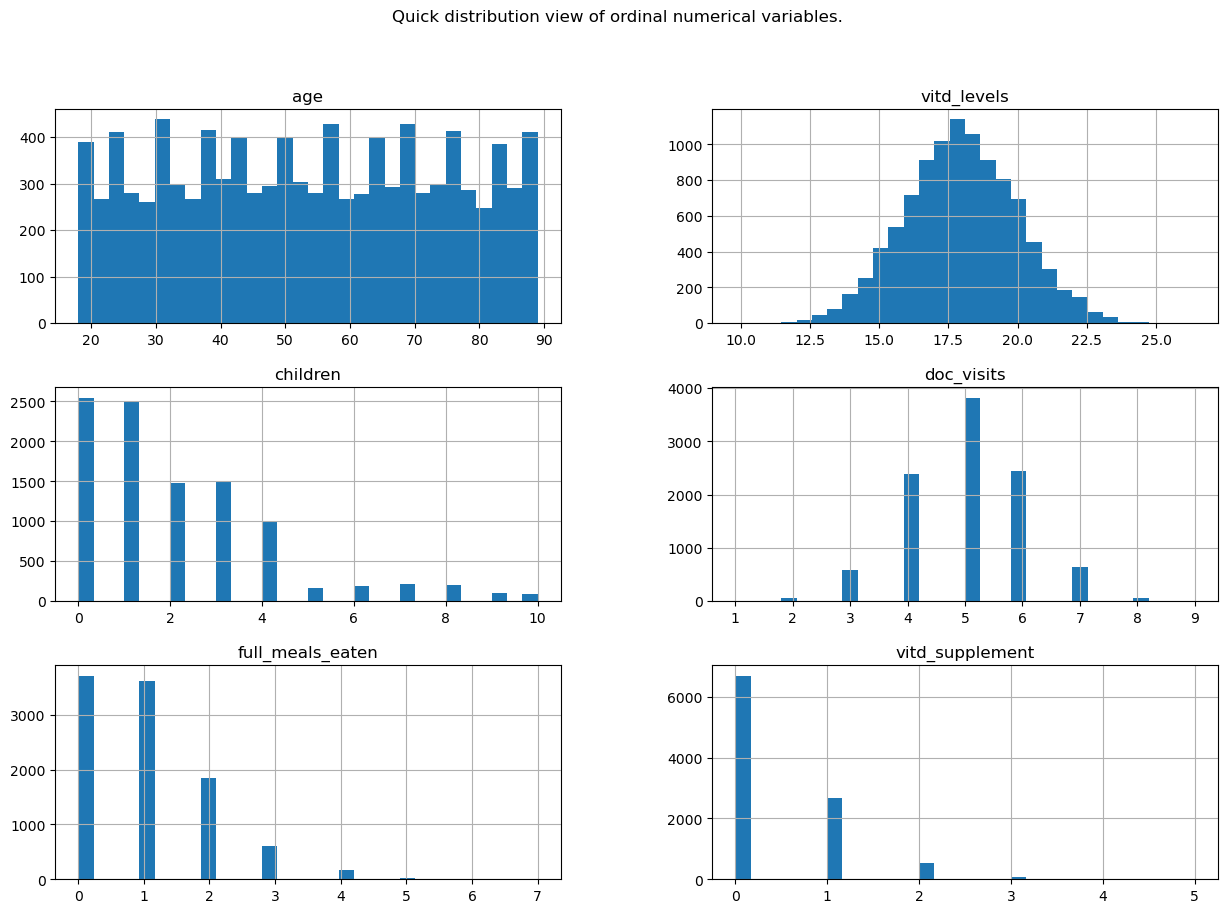

In [5]:
df[num_vars].hist(bins=30, figsize=(15, 10))
plt.suptitle(f'Quick distribution view of ordinal numerical variables.')
plt.show()

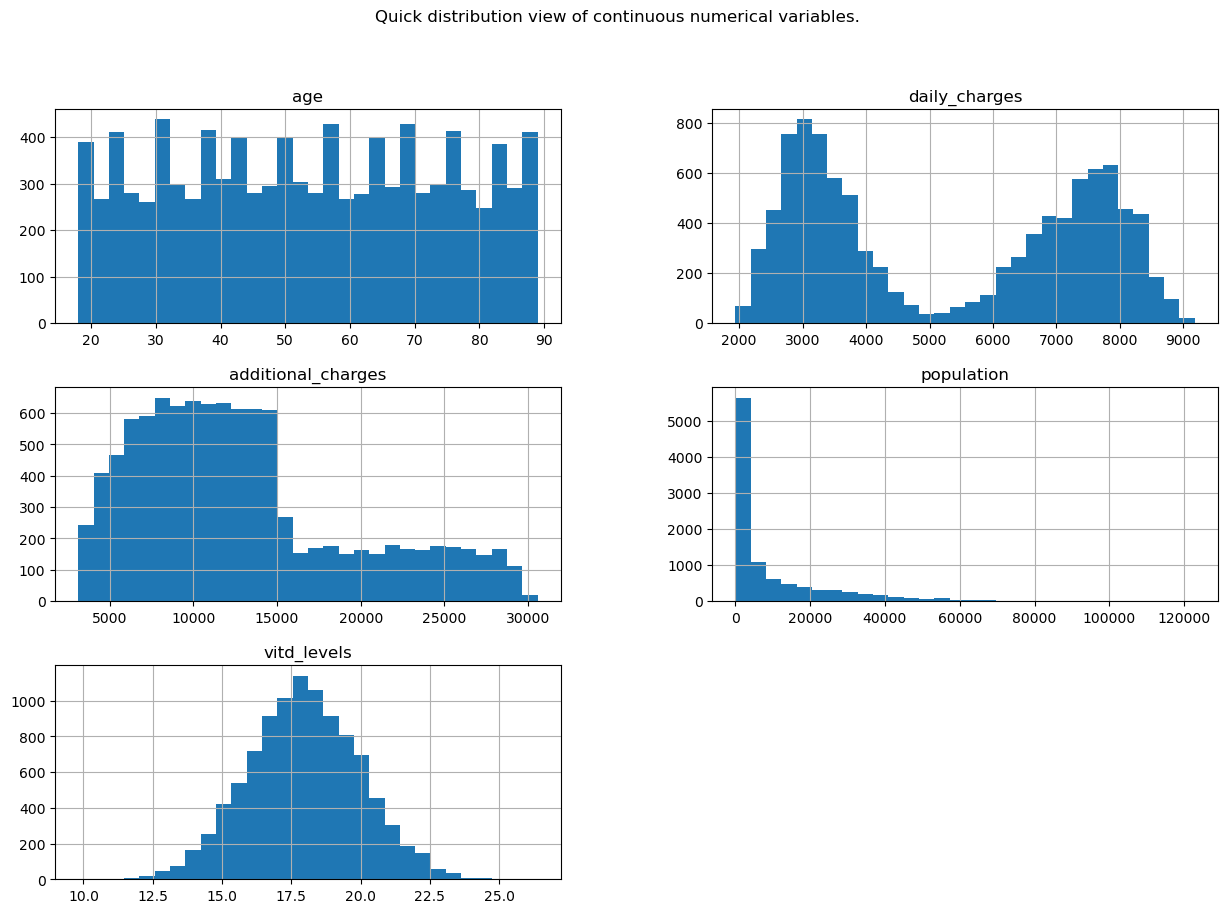

In [6]:
df[cont_vars].hist(bins=30, figsize=(15, 10))
plt.suptitle(f'Quick distribution view of continuous numerical variables.')
plt.show()

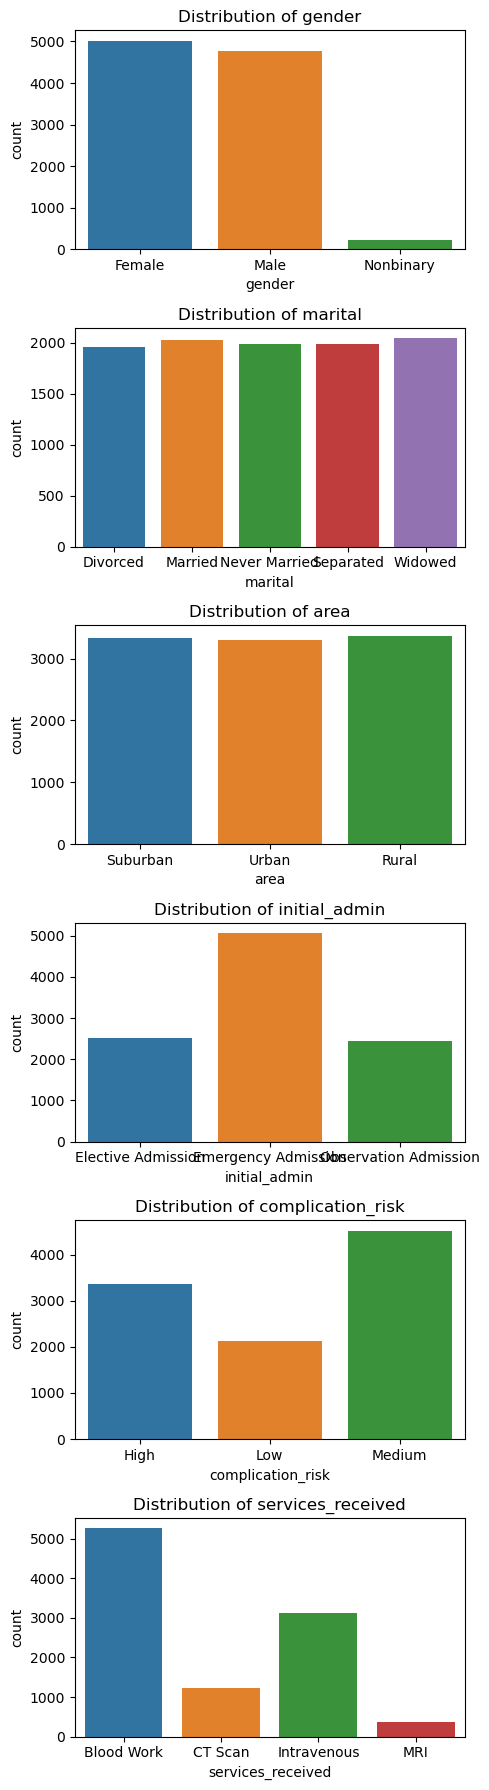

In [7]:
# set up subplots
fig, axes = plt.subplots(nrows=len(cat_vars), figsize=(5, 18))

# Plot each categorical column as a separate subplot
for i, col in enumerate(cat_vars):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

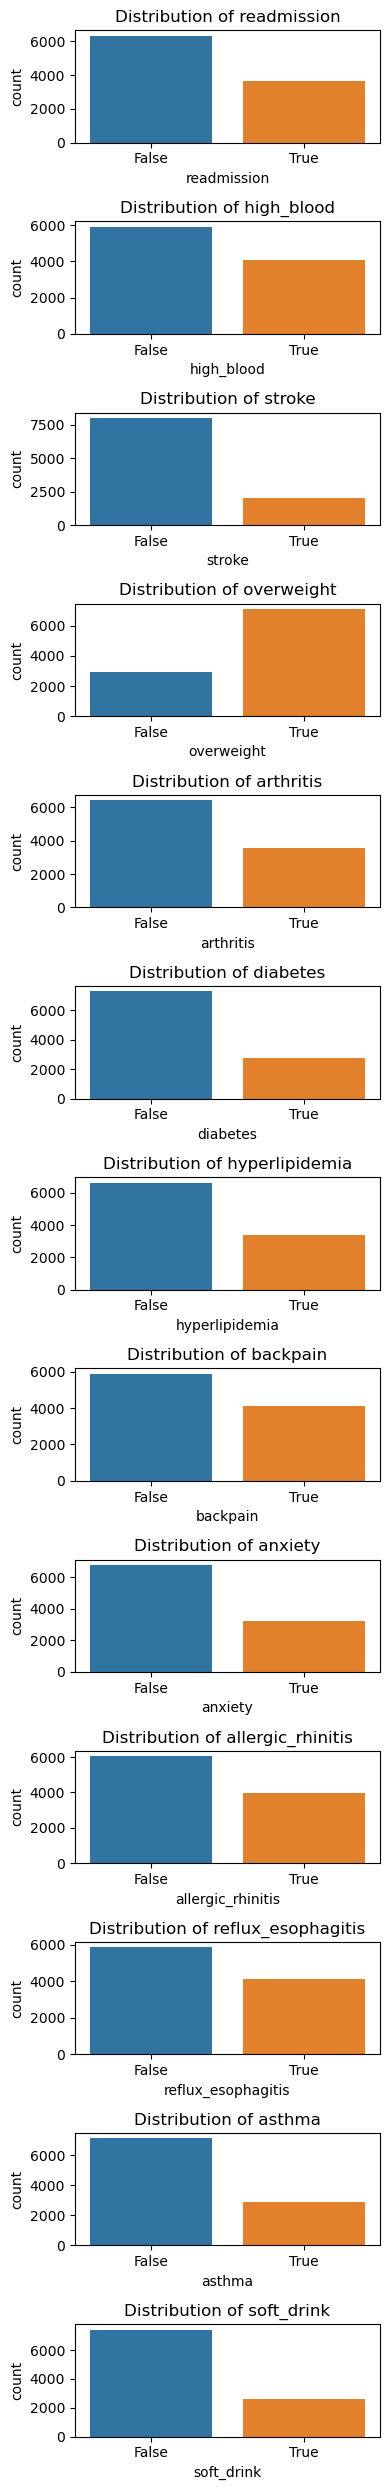

In [8]:
# set up subplots
fig, axes = plt.subplots(nrows=len(bool_vars), figsize=(4, 25))

# Plot each categorical column as a separate subplot
for i, col in enumerate(bool_vars):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

DISCUSSION ON DISTRIBUTIONS

***Model Preparation***

### Transform Categorical (Dummy Variables)

**Categorical Features**
The columns listed below are nominal categorical variables, meaning they represent categories without any inherent order or ranking. For use in modeling, these categorical variables need to be transformed into numerical representations. However, assigning arbitrary numerical values to each category (e.g. 1 for female and 2 for male) would incorrectly imply a meaningful order and mislead the model. To address this, we use dummy variables, which convert each category into a binary (0 or 1) representation, ensuring that no ordinal relationship is inferred between the categories. This process enables the model to correctly interpret the categorical data without the issue of bias.

Typically, Bernoulli Naive Bayes is better for binary or dummy variables, while Gaussian is best for continuous data. In this instance, I'll start by exploring Gaussian Naive Bayes and compare it with Bernoulli to see if one algorithm can handle the entire data set, which includes a mix of categorical, boolean, and continuous variables, without needing to split the data across multiple models.

In [9]:
print(f'Categorical variables to be one hot encoded {cat_vars}')
print('---------')
# Create dummies for the specified columns
dummy_df = pd.get_dummies(df[cat_vars], drop_first=True)

print(f'New dummy columns {list(dummy_df.columns)}')

# concatenate the original dataframe with the dummies
df = pd.concat([df, dummy_df], axis=1)

# # drop the original columns 
df.drop(columns = cat_vars, inplace=True)

df[dummy_df.columns].sample(5)

Categorical variables to be one hot encoded ['gender', 'marital', 'area', 'initial_admin', 'complication_risk', 'services_received']
---------
New dummy columns ['gender_Male', 'gender_Nonbinary', 'marital_Married', 'marital_Never Married', 'marital_Separated', 'marital_Widowed', 'area_Suburban', 'area_Urban', 'initial_admin_Emergency Admission', 'initial_admin_Observation Admission', 'complication_risk_Low', 'complication_risk_Medium', 'services_received_CT Scan', 'services_received_Intravenous', 'services_received_MRI']


,gender_Male,gender_Nonbinary,marital_Married,marital_Never Married,marital_Separated,marital_Widowed,area_Suburban,area_Urban,initial_admin_Emergency Admission,initial_admin_Observation Admission,complication_risk_Low,complication_risk_Medium,services_received_CT Scan,services_received_Intravenous,services_received_MRI
3570,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
5084,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0
8583,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0
8418,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1
7153,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0


### Transform Continuous Variables

Scaling (also known as standardizing) numerical continuous values is necessary for the model. For Gaussian NB, this algorithm assumes it's features are normally distributed. Standardizing continuous features helps essentially massage the data into a Gaussian distribution by ensuring the features have a similar scale.


There are several methods for standardizing data, each with different applications. The MinMaxScaler from sklearn scales numerical values to a range between 0 and 1. Another method the RobustScaler which is particularly useful for datasets with outliers. Lastly and most appropriate for this project is the StandardScaler. This scaler normalizes the data to a standard Gaussian distribution. This is needed for most of our continuous values. As we saw above from the visualizations, vit_d is the only normally distributed variable.

In [ ]:
***Scaling Continuous Values***

## C4.  Provide a copy of the cleaned data set.

# Part IV: Modeling Analysis

D.  Perform the modeling data analysis and report on the results by doing the following:

1.  Split the data into training and test data sets and provide the file(s).

2.  Describe the modeling analysis technique you used to appropriately model analyze the data. Include screenshots of the intermediate calculations you performed.

3.  Provide the code used to perform the classification model analysis from part D2.

# Part V: Data Summary and Implications

E.  Summarize your data analysis by doing the following:

1.  Explain the accuracy and the area under the curve (AUC) of your classification model.

2.  Discuss the results and implications of your classification analysis.

3.  Discuss one limitation of your data analysis.

4.  Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.

# Web Sources
- https://www.cdc.gov/diabetes/php/data-research/index.html#:~:text=Among%20the%20U.S.%20population%20overall,Table%201a%3B%20Table%201b).

- https://www.ibm.com/topics/naive-bayes#:~:text=IBM-,What%20are%20Na%C3%AFve%20Bayes%20classifiers%3F,probability%20to%20perform%20classification%20tasks.

- https://scikit-learn.org/stable/modules/naive_bayes.html

- https://www.youtube.com/watch?v=O2L2Uv9pdDA

- https://iq.opengenus.org/types-of-naive-bayes/

- https://spotintelligence.com/2024/05/31/naive-bayes-classification/